# Lecture 4: Edges
### Juan Carlos Niebles and Adrien Gaidon

In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from scipy.ndimage.filters import convolve
from skimage.transform import hough_line, hough_line_peaks

## 1D Discrete Derivatives
- Backward filter $f'(x) = f(x) - f(x-1)$.  Convolve with $h_b =\left[ 0, 1, -1 \right]$. 
- Forward filter $f'(x) = f(x+1) - f(x)$. Convolve with $h_f =\left[ 1, -1, 0 \right]$. 
- Central filter $f'(x) = f(x+1) - f(x-1)$. Convolve with $h_c = \left[ \frac{1}{2}, 0, -\frac{1}{2} \right]$. 


In [2]:
hb = np.array([[0,1,-1]])
hf = np.array([[1,-1,0]])
hc = np.array([[1,0,-1]])

f = np.array([[10, 15, 10, 10, 25, 20, 20, 20 ]])
print("Input f:", f)

# run backward and forward approximations, use zero padding

Input f: [[10 15 10 10 25 20 20 20]]


# 2D Discrete Derivatives
 
Apply 2D discrete derivatives to ```iguana.png```. Display image and $x$ a

$h_x = \frac{1}{3}
\begin{bmatrix}
1 & 0 & -1\\
1 & 0 & -1\\
1 & 0 & -1
\end{bmatrix}, 
h_y = \frac{1}{3}
\begin{bmatrix}
1 & 1 & 1\\
0 & 0 & 0\\
-1 & -1 & -1
\end{bmatrix}$

-0.7464052287581698 0.5529411764705883
-0.5477124183006535 0.730718954248366


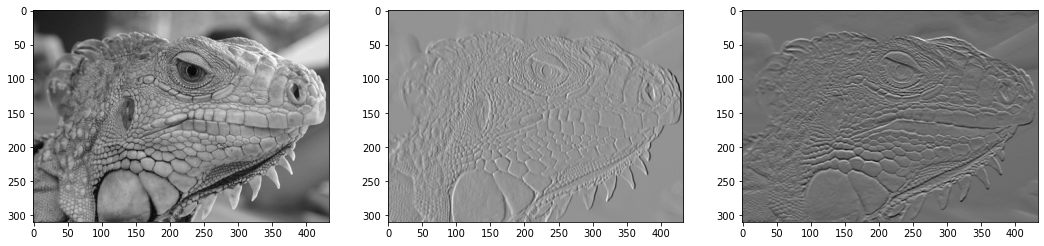

In [3]:
hx = (1/3) * np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
hy = (1/3) *np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

img = io.imread("iguana.png", as_gray=True)
imgx = convolve(img, hx); print(np.min(imgx), np.max(imgx))
imgy = convolve(img, hy); print(np.min(imgy), np.max(imgy))

plt.figure(figsize=(18, 6))
plt.subplot(1,3,1); plt.imshow(img, cmap="gray")
plt.subplot(1,3,2); plt.imshow(convolve(img, hx), cmap="gray")
plt.subplot(1,3,3); plt.imshow(convolve(img, hy), cmap="gray")

# Gradient magnitude
The gradient is a vector at each pixel: $\nabla f(x,y) = \left[ \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right] $.
We can plot the gradient magnitude:
$||\nabla f|| = \sqrt{ \left( \frac{\partial f}{\partial x} \right)^2 + \left( \frac{\partial f}{\partial y} \right)^2}$.
This magnitude is a measure of edge strength.

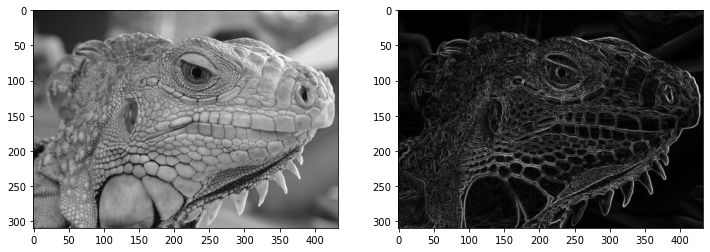

In [4]:
mag = np.sqrt((imgx * imgx) + (imgy * imgy))
plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img, cmap="gray")
plt.subplot(1,2,2); plt.imshow(mag, cmap="gray")

## Canny edge detector

Canny edge detection combines image smoothing and hysteresis thresholding for optimal detection under certain conditions.

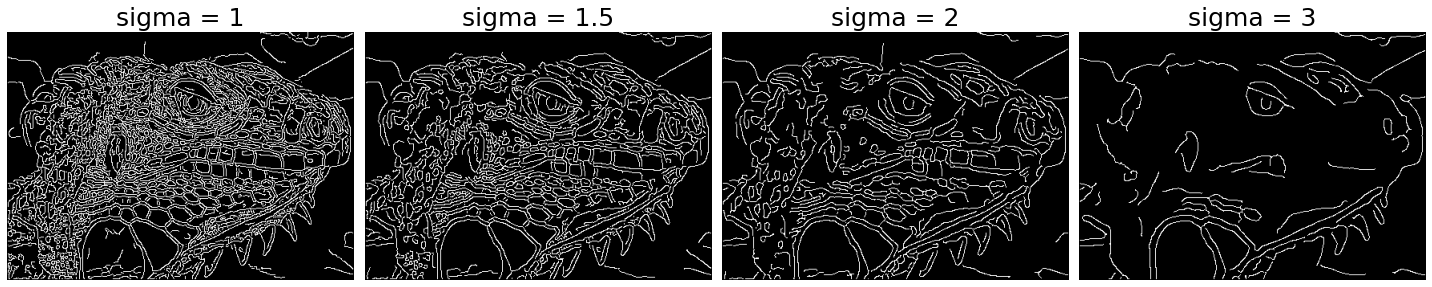

In [5]:
from skimage import feature
sigma = [1, 1.5, 2, 3]
plt.figure(figsize=(20, 5))
for idx, s in enumerate(sigma):
    edge = feature.canny(img, sigma=s)
    plt.subplot(1, 4, idx+1)
    plt.imshow(edge, cmap="gray"); plt.title("sigma = {}".format(s), fontsize=25)
    plt.gca().set_axis_off()
plt.tight_layout()

## Hough Transform for line detection



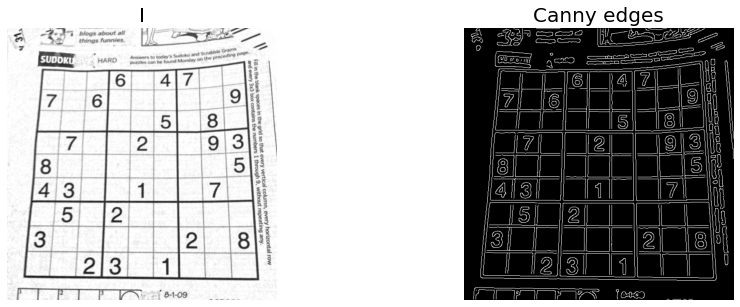

In [81]:
img = io.imread("sudoku.png", as_gray=True)
edge = feature.canny(img, sigma=2)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off"); plt.title('I', fontsize=20)
plt.subplot(1,2,2)
plt.imshow(edge, cmap="gray")
plt.axis("off"); plt.title('Canny edges', fontsize=20);

## Hough Transform for line detection



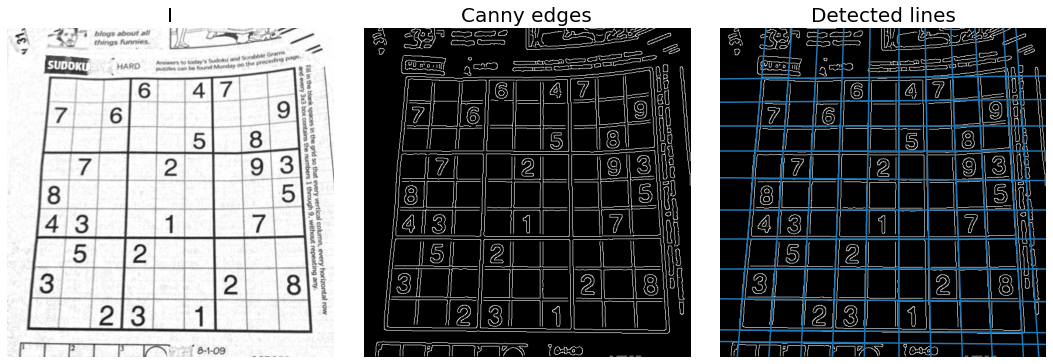

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(img, cmap="gray"); plt.gca().set_axis_off(); plt.title('I', fontsize=20)
plt.subplot(1,3,2); plt.imshow(edge, cmap="gray"); plt.gca().set_axis_off(); plt.title('Canny edges', fontsize=20)
plt.subplot(1,3,4); plt.imshow(edge, cmap="gray"); plt.gca().set_axis_off(); plt.title('Detected lines', fontsize=20)
plt.subplot(1,3,3); plt.imshow(edge, cmap="gray"); plt.gca().set_axis_off(); plt.title('Detected lines', fontsize=20)

tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(edge, theta=tested_angles)

for _, angle, dist in zip(*hough_line_peaks(h, theta, d, threshold=150)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    plt.axline((x0, y0), slope=np.tan(angle + np.pi/2))
plt.gca().set_ylim((img.shape[0], 0)); plt.gca().set_xlim((0,img.shape[1])); plt.tight_layout()

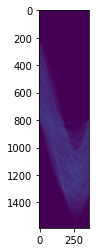

In [88]:
plt.imshow(h)

In [95]:
np.max(h)

393

(360,)

In [49]:
ax

array([<AxesSubplot:title={'center':'I'}>,
       <AxesSubplot:title={'center':'I'}>,
       <AxesSubplot:title={'center':'Detected lines'}>], dtype=object)

In [50]:
axes

array([<AxesSubplot:title={'center':'I'}>,
       <AxesSubplot:title={'center':'I'}>,
       <AxesSubplot:title={'center':'Detected lines'}>], dtype=object)